# Pymaceuticals Inc.
---

### Analysis

- There are 3 observations/inferences that can be made.
- First, Capomulin, along with Ramicane, seems to be the most effective drug in reducing tumour volume in all mice, as can be seen by its subjects having the lowest mean and median tumour volume. This observation can be further supported by both drugs being tested on more number of mice than other drugs and thus having the lowest variance, standard deviation and SEM. Capomulin, along with Ramicane, also results in its test subjects having the lowest final tumour volume in contrast with Infubinol and Ceftamin.
- Next, in general, the more Capomulin is given to a cancerous mouse, the more effective it is in reducing its tumour volume. However, there also seems to be a limit to its dosage that can be given and its effectivness. The tumour volume of mouse l509 drastically reduced after the mouse was given Capomulin for 35 days but increased after it was given Capomulin for 10 more days. More experiment and analysis need to be done to verify whether there is indeed a limit to how much Capomulin can be given and whether Capomulin can indeed reduce tumour volume to 0.
- Finally, it seems that the heavier the mouse, the less effective Capomulin is in reducing tumour volume, as there is a strong positive correlation between mouse weight and the average tumor volume for mice under the treatment of Capomulin.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_df = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')

# Display the data table for preview
data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(data_df["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Determine which row has both Mouse ID and Timepoint duplicated
dup_bool_sr = data_df.loc[:,["Mouse ID","Timepoint"]].duplicated(keep=False)

# Get the index numbers for the duplicated rows
dup_mice_index_sr = [x for x in dup_bool_sr.index if dup_bool_sr[x]==True]

# Determine the corresponding Mouse ID for each index number
dup_mice_df = data_df.iloc[dup_mice_index_sr]

# Get and display the duplicate mice's Mouse IDs
dup_mice = dup_mice_df["Mouse ID"].unique()
dup_mice

array(['g989'], dtype=object)

In [4]:
# Get all the data for the duplicate mouse ID. 
dup_mouse_df = data_df.loc[data_df["Mouse ID"]==dup_mice[0],:]
dup_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = data_df.loc[data_df["Mouse ID"]!=dup_mice[0],:]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_df = clean_df.groupby(["Drug Regimen"])
tumor_mean = drug_df["Tumor Volume (mm3)"].mean()
tumor_median = drug_df["Tumor Volume (mm3)"].median()
tumor_var = drug_df["Tumor Volume (mm3)"].var()
tumor_std = drug_df["Tumor Volume (mm3)"].std()
tumor_SEM = drug_df["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
tumor_sum_df = pd.DataFrame({
    "Mean Tumor Volume": tumor_mean,
    "Median Tumor Volume": tumor_median,
    "Tumor Volume Variance": tumor_var,
    "Tumor Volume Std. Dev.": tumor_std,
    "Tumor Volume Std. Err.": tumor_SEM
    }
)

tumor_sum_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
clean_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": ["mean","median","var","std","sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

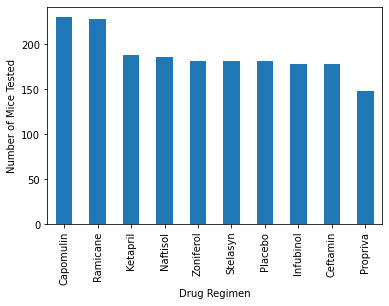

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Start by getting the total number of timepoints for all mice tested for each drug regimen
mice_tested = clean_df.groupby(["Drug Regimen"])["Mouse ID"].count()

# Sort the values in a descending order
mice_tested_des = mice_tested.sort_values(ascending=False)

# Plot the bar plot using Pandas
mice_tested_graph = mice_tested_des.plot(kind='bar')
mice_tested_graph.set_ylabel("Number of Mice Tested")
plt.show()

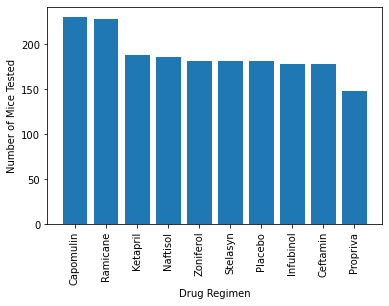

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# The indices of mice_tested_des are the names of the drug regimens
drug_name = mice_tested_des.index

# Plot the bar plot using Pyplot
plt.bar(drug_name, mice_tested_des, color='tab:blue', alpha=1, align="center")
tick_locations = [value for value in drug_name]
plt.xticks(tick_locations, mice_tested_des.index, rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

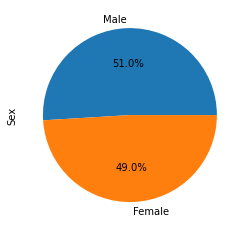

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Start by determining the number of each sex
sex_df = clean_df["Sex"].value_counts()

# Plot the pie plot using Pandas
sex_graph = sex_df.plot(kind='pie',autopct='%.1f%%')
sex_graph.set_ylabel("Sex")
plt.show()

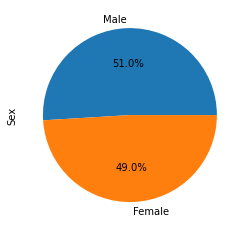

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colours = ["tab:blue", "tab:orange"]
labels=["Male","Female"]
plt.pie(sex_df, labels=labels, colors=colours, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_bymouse = clean_df.groupby(["Mouse ID"])["Timepoint"].max()
last_timepoint_bymouse = last_timepoint_bymouse.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_df = last_timepoint_bymouse.merge(clean_df, how='left', on=['Mouse ID','Timepoint'])

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in drugs: # Iterate through each drug in the drugs list

    # Locate the rows which contain mice on the drug of this iteration and get the tumor volumes
    fnl_tumor_vol = last_timepoint_df.loc[last_timepoint_df["Drug Regimen"]==x,"Tumor Volume (mm3)"]
    
    # add subset to tumor_vol_list
    tumor_vol_list.append(fnl_tumor_vol) # tumor_vol_list becomes a list of lists
    
    # Determine for the drug of this iteration the outliers using upper and lower bounds
    quartiles = fnl_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = [] # Initialise and also reset the outliers list for use by the drug of the next iteration
    outliers = fnl_tumor_vol.loc[(fnl_tumor_vol > upper_bound) | (fnl_tumor_vol < lower_bound)]
    print(f"{x}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


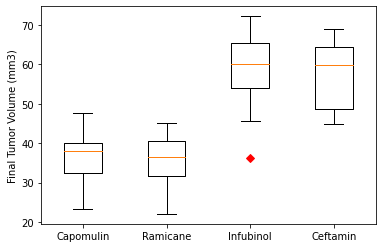

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Assemble the drug names and their corresponding tumor volume lists into a data frame
boxplot_df = pd.DataFrame({
    drugs[0]: tumor_vol_list[0],
    drugs[1]: tumor_vol_list[1],
    drugs[2]: tumor_vol_list[2],
    drugs[3]: tumor_vol_list[3]
})

# Plot the boxplot
ax = boxplot_df.plot(kind='box',color=dict(boxes='k',medians='tab:orange',whiskers='k'),sym="rD")
ax.set_ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

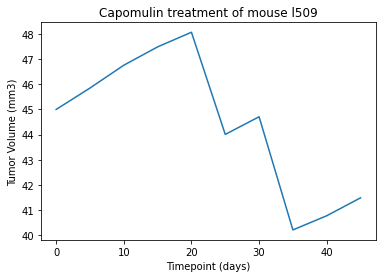

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Start by getting all the data for mouse l509
mouse_l509_df = clean_df.loc[clean_df["Mouse ID"]=="l509",:]

# Locate the time points and the corresponding tumor volumes using groupby
mouse_l509_narrow_df = mouse_l509_df.loc[:,["Timepoint","Tumor Volume (mm3)"]].groupby("Timepoint")["Tumor Volume (mm3)"] \
                        .unique().astype('float')

# Plot the line plot
ax2 = mouse_l509_narrow_df.plot(kind='line')
ax2.set_title("Capomulin treatment of mouse l509")
ax2.set_ylabel('Tumor Volume (mm3)')
ax2.set_xlabel('Timepoint (days)')
plt.show()

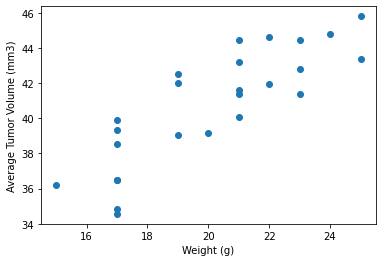

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Start by getting the relevant data of all mice under the treatment of the Capomulin regimen
cap_df = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin",["Mouse ID","Tumor Volume (mm3)","Weight (g)"]]

# Get the mean tumor volume for each mouse
cap_grpdf = cap_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
cap_tv_df = cap_grpdf.reset_index()

# Get the weight for each mouse
cap_grpdf2 = cap_df.groupby("Mouse ID")["Weight (g)"].max()
cap_wg_df = cap_grpdf2.reset_index()

# Merge the two dataframes into a new one with Mouse ID, Weight and the mean Tumor Volume as columns
cap_df_new = pd.merge(cap_wg_df,cap_tv_df,how='left',on="Mouse ID")

# Plot the scatter plot
x_values = cap_df_new["Weight (g)"]
y_values = cap_df_new["Tumor Volume (mm3)"]
plt.scatter(x_values,y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


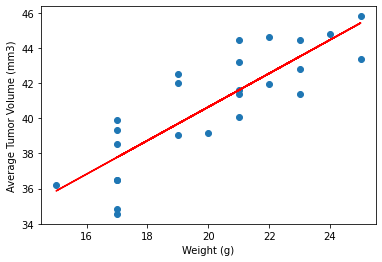

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Plot the same scatter plot again
plt.scatter(x_values,y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Calculate the linear regression model and plot the linear regression line on top of the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")

# Calculate the correlation coefficient and print it
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")